In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, Image
from google.colab import files
from matplotlib.ticker import PercentFormatter, FuncFormatter, MultipleLocator
from IPython.display import display
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.   Green = Ground
2.   Blue = Channel
3.   Red = floating- nothing connected
4.  Outputs: T21, 17, 16, 10, 11, 7, 4, 3



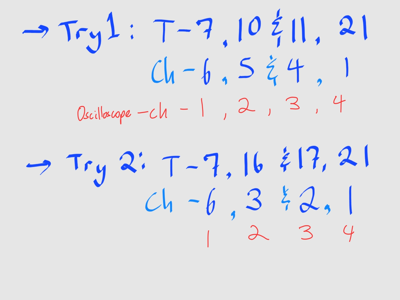

In [ ]:
# Load the image
image_path = '/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Images/T3-4-7-10-11-16-17-21.png';
original_image = Image.open(image_path);

# Define the desired size for the resized image
desired_width = 400  # Adjust this value as needed
desired_height = 300  # Adjust this value as needed

# Resize the image
img1 = original_image.resize((desired_width, desired_height));

# Display the resized image
display(img1)

#Try 1

# Trace order originally.

1.   Channel 1 = T21
2.   Ch2 = T17
3.   Ch3 = T16
4.   Ch4 = T11
5.   Ch5 = T10
6.   Ch6 = T7
7.   Ch7 = T4
8.   Ch8 = T3

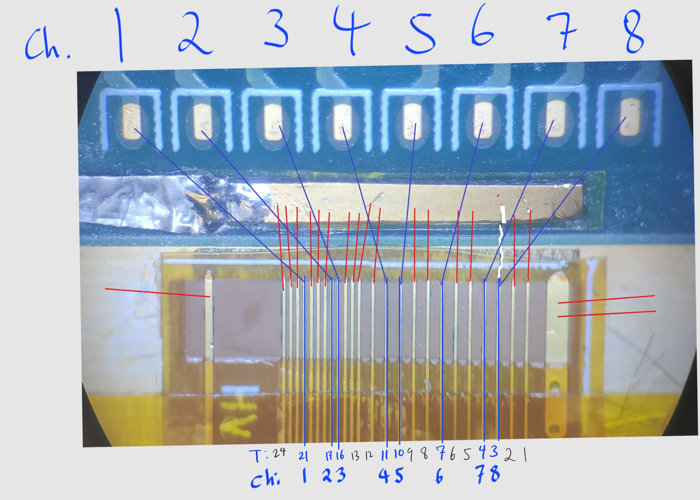

In [ ]:
# Load the image
image_path = '/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Images/flex_7cm.png';
original_image = Image.open(image_path);

# Define the desired size for the resized image
desired_width = 700  # Adjust this value as needed
desired_height = 500  # Adjust this value as needed

# Resize the image
img2 = original_image.resize((desired_width, desired_height));

# Display the resized image
display(img2)

In [ ]:
def wave_list(trace_min,trace_max,ch_num,rt_num):
  list_wave = []
  trace_max += 1

  for rise_time in range(0,rt_num):
    list_wave.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_wave[rise_time].append([])

  list_t = []
  for rise_time in range(0,rt_num):
    list_t.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_t[rise_time].append([])

  list_a = []
  for rise_time in range(0,rt_num):
    list_a.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_a[rise_time].append([])

  for rise_time in range(0,rt_num):
    for inj_num in range(0,trace_max - trace_min):
      for ch_num in range(1,ch_num+1):

        list_ = f"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Lab Data Transfer/4.22.2024/7-16-17-21/7-16-17-21-inj/C{ch_num}--7-16-17-21-inj{inj_num+3}--0000{rise_time}.csv"

        list_t[rise_time][inj_num].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["time"])
        list_a[rise_time][inj_num].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])

  return list_t,list_a

In [ ]:
list_t, list_a = wave_list(3,22,4,3)

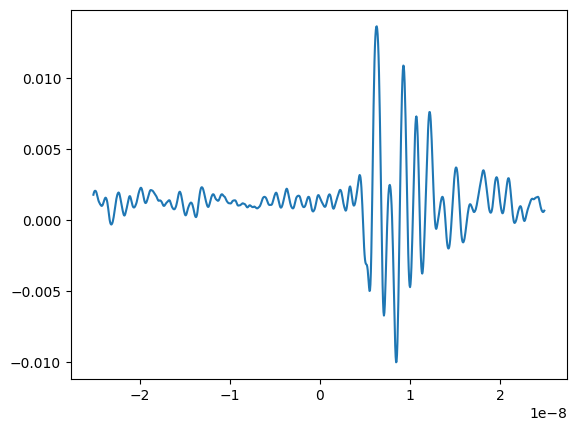

In [ ]:
plt.plot(list_t[0][6][1],list_a[0][6][1]);

In [ ]:
#Plotting signals

#3 traces
def plt_signal_T3(ch1_amp,ch2_amp,ch3_amp,ch4_amp,ch1_t,ch2_t,ch3_t,ch4_t,inj,T1,T2,T3,T4, ch1, ch2, ch3, ch4, x1,x2,min,max,rise_time,saveplot=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors"):
  if saveplot == True:
    plt.figure()
    plt.ylabel("Amplitude (V)", fontweight="heavy")
    plt.xlabel("Time (sec)", fontweight="heavy")
    plt.xlim(x1,x2)
    if ((inj==T1) or (inj==T2) or (inj==T3)) or (inj==T4):
      plt.ylim(-max*1.05,min*1.75)
    else:
      plt.ylim(-min*1.5,min*1.5)
    l = [0.25,0.5,1]
    plt.title(f"Rise Time: {l[rise_time]} ns, Inject: Trace {inj} for T={T1},{T2},{T3},{T4}", fontweight="heavy")
    plt.plot(ch1_t,ch1_amp, label=f"Trace {T1}/Channel {ch1}", color = "blue");
    plt.plot(ch2_t,ch2_amp, label=f"Trace {T2}/Channel {ch2}", color = "green");
    plt.plot(ch3_t,ch3_amp, label=f"Trace {T3}/Channel {ch3}", color = "orange");
    plt.plot(ch4_t,ch4_amp, label=f"Trace {T4}/Channel {ch4}", color = "red");

    plt.savefig(f'{directory}/plots-inj{inj}-rt{l[rise_time]}.png')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.show()
  else:
    plt.figure()
    plt.ylabel("Amplitude (V)", fontweight="heavy")
    plt.xlabel("Time (sec)", fontweight="heavy")
    plt.xlim(x1,x2)
    if ((inj==T1) or (inj==T2) or (inj==T3)) or (inj==T4):
      plt.ylim(-max*1.05,min*1.75)
    else:
      plt.ylim(-min*1.5,min*1.5)
    l = [0.25,0.5,1]
    plt.title(f"Rise Time: {l[rise_time]} ns, Inject: Trace {inj} for T={T1},{T2},{T3},{T4}", fontweight="heavy")
    plt.plot(ch1_t,ch1_amp, label=f"Trace {T1}/Channel {ch1}", color = "blue");
    plt.plot(ch2_t,ch2_amp, label=f"Trace {T2}/Channel {ch2}", color = "green");
    plt.plot(ch3_t,ch3_amp, label=f"Trace {T3}/Channel {ch3}", color = "orange");
    plt.plot(ch4_t,ch4_amp, label=f"Trace {T4}/Channel {ch4}", color = "red");

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.show()

  #  (|max1|-|max2|)/|max1| = %
  #  (|max1|-|max3|)/|max1| = %
  if ((inj==T1) or (inj==T2) or (inj==T3)) or (inj==T4):
    if (inj == T1):
      inj_amp = ch1_amp
      abs_inj_amp = np.abs(ch1_amp)
      abs_ch2_amp = np.abs(ch2_amp)
      abs_ch3_amp = np.abs(ch3_amp)
      abs_ch4_amp = np.abs(ch4_amp)

      max_inj = np.max(abs_inj_amp)
      max2 = np.max(abs_ch2_amp)
      max3 = np.max(abs_ch3_amp)
      max4 = np.max(abs_ch4_amp)
    elif (inj == T2):
      inj_amp = ch2_amp
      abs_ch2_amp = np.abs(ch1_amp)
      abs_inj_amp = np.abs(inj_amp)
      abs_ch3_amp = np.abs(ch3_amp)
      abs_ch4_amp = np.abs(ch4_amp)

      max2 = np.max(abs_ch2_amp)
      max_inj = np.max(abs_inj_amp)
      max3 = np.max(abs_ch3_amp)
      max4 = np.max(abs_ch4_amp)
    elif (inj == T3):
      inj_amp = ch3_amp
      abs_ch2_amp = np.abs(ch1_amp)
      abs_ch3_amp = np.abs(ch2_amp)
      abs_inj_amp = np.abs(inj_amp)
      abs_ch4_amp = np.abs(ch4_amp)

      max2 = np.max(abs_ch2_amp)
      max3 = np.max(abs_ch3_amp)
      max_inj = np.max(abs_inj_amp)
      max4 = np.max(abs_ch4_amp)

    else:
      inj_amp = ch4_amp
      abs_ch2_amp = np.abs(ch1_amp)
      abs_ch3_amp = np.abs(ch2_amp)
      abs_ch4_amp = np.abs(ch3_amp)
      abs_inj_amp = np.abs(inj_amp)

      max2 = np.max(abs_ch2_amp)
      max3 = np.max(abs_ch3_amp)
      max4 = np.max(abs_ch4_amp)
      max_inj = np.max(abs_inj_amp)

    accuracy_inj_ch2 = (max_inj - max2)/max_inj
    accuracy_inj_ch3 = (max_inj - max3)/max_inj
    accuracy_inj_ch4 = (max_inj - max4)/max_inj

    # average of amplitude/
    avg_ch1 = np.mean(ch1_amp)
    avg_ch2 = np.mean(ch2_amp)
    avg_ch3 = np.mean(ch3_amp)
    avg_ch4 = np.mean(ch4_amp)

    print(f"Absolute Maximum Value: Injectected: {max_inj:.6f}, Other non-injected: {max2:.6f}, {max3:.6f}.")

    print(f"Accuracy with Trace {inj} and Trace {T2}: {accuracy_inj_ch2*100:.2f}%. {100-accuracy_inj_ch2*100:.2f}% crosstalk.")
    print(f"Accuracy with Trace {inj} and Trace {T3}: {accuracy_inj_ch3*100:.2f}%. {100-accuracy_inj_ch3*100:.2f}% crosstalk.")
    print(f"Accuracy with Trace {inj} and Trace {T4}: {accuracy_inj_ch4*100:.2f}%. {100-accuracy_inj_ch4*100:.2f}% crosstalk.")

    print(f"Average Amplitude for Trace {T1}(Channel {ch1}): {avg_ch1:.6f}.")
    print(f"Average Amplitude for Trace {T2}(Channel {ch2}): {avg_ch2:.6f}.")
    print(f"Average Amplitude for Trace {T3}(Channel {ch3}): {avg_ch3:.6f}.")
    print(f"Average Amplitude for Trace {T4}(Channel {ch4}): {avg_ch4:.6f}.")

In [ ]:
ch_num = 4
rt_num = 3
trace_min = 3
trace_max = 22 - trace_min +1

In [ ]:
abs_max = np.abs(list_a)
max = np.max(abs_max[0])

min = np.max(list_a[0][18])


for l in range(0,rt_num):
  for i in range(0,trace_max):
      plt_signal_T3(list_a[l][i][0],list_a[l][i][1],list_a[l][i][2],list_a[l][i][3],list_t[l][i][0],list_t[l][i][1],list_t[l][i][2],list_t[l][i][3],i+3,7,16,17,21, 6, 3, 2, 1,-.5*10**-8 ,2*10**-8, min,max,l, saveplot=True, directory = "/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.16.17.21/RT-0.25-0.5-1-inj")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def noise_crosstalk(amp_noise,amp_list):
  absmax_amp=(max(abs(amp_list[0][1])))
  print(f"Abs max = {absmax_amp:.6f}\n")

  absmax_noise_list = []
  for i in range(0,3):
    absmax_noise_list.append(max(abs(amp_noise[i])))
    print(f"Abs noise max ch{i+1}= {absmax_noise_list[i]:.6f}")

    noise_crosstalk = (1-(absmax_amp-absmax_noise_list[i])/absmax_amp)*100

    print(f"Noise cross talk ch{i+1} = {noise_crosstalk:.6f}%\n")

In [ ]:
def position_plots(amp,trace_min,trace_max,l,ch_num,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/"):
  trace_x = list(range(trace_min,trace_max+1))

  position = []

  for rt in range(0,len(l)):
    position.append([])
    for ch in range(ch_num):
      position[rt].append([])

  for rt in range(0,len(l)):
    for ch in range(ch_num):
      for tr in range(0,trace_max-trace_min+1):
        position[rt][ch].append(np.max(np.abs(amp[rt][tr][ch])))

  for rt in range(len(l)):
    for ch in range(ch_num):
      #finding % cross talk
      max_a = np.max(position[rt][ch])
      max_amp = max_a/max_a

      crosstalk = []

      for amp in position[rt][ch]:
        crosstalk.append(1-(max_a-amp)/max_a)

      #plot
      plt.figure(figsize=(16,6))
      plt.title(f"Rise time={l[rt]}ns, Ch{ch+1}", fontweight="heavy", fontsize=20)
      plt.ylabel("Amplitude (V)", fontweight="heavy", fontsize=10)
      plt.xlabel("Trace (#)", fontweight="heavy", fontsize=10)
      plt.xlim(trace_min-1,trace_max+1)
      plt.grid(True)
      if ch == 1:
        c = "darkred"
      elif ch == 2:
        c = "red"
      elif ch == 3:
        c = "hotpink"
      else:
        c = "orange"
      plt.plot(trace_x,position[rt][ch],color=c,marker="o")
      for i in range(len(trace_x)):
        plt.annotate(f'{crosstalk[i]*100:.2f}%', (trace_x[i], position[rt][ch][i]), fontsize=10, fontweight="heavy", color="navy")


      plt.show()
      print("\n")

  return position

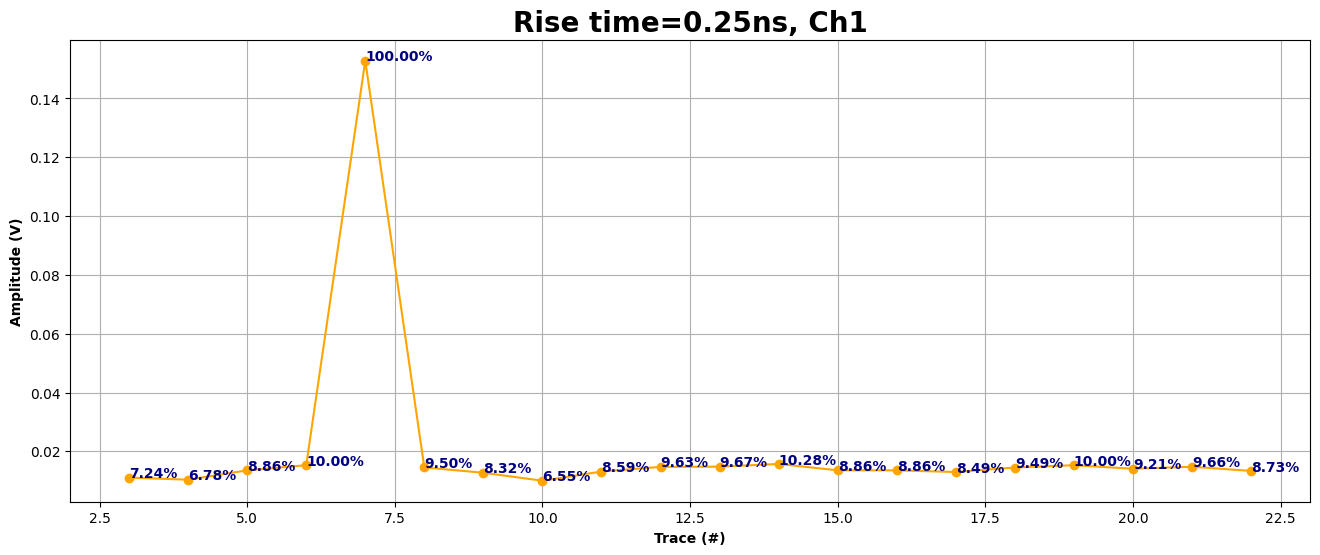

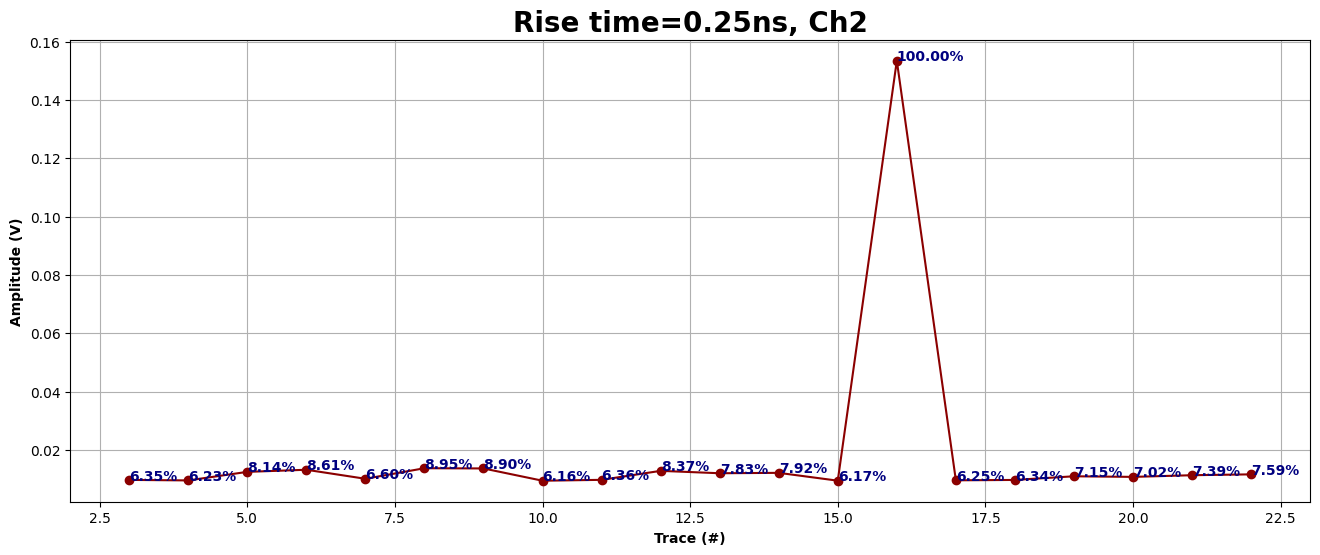

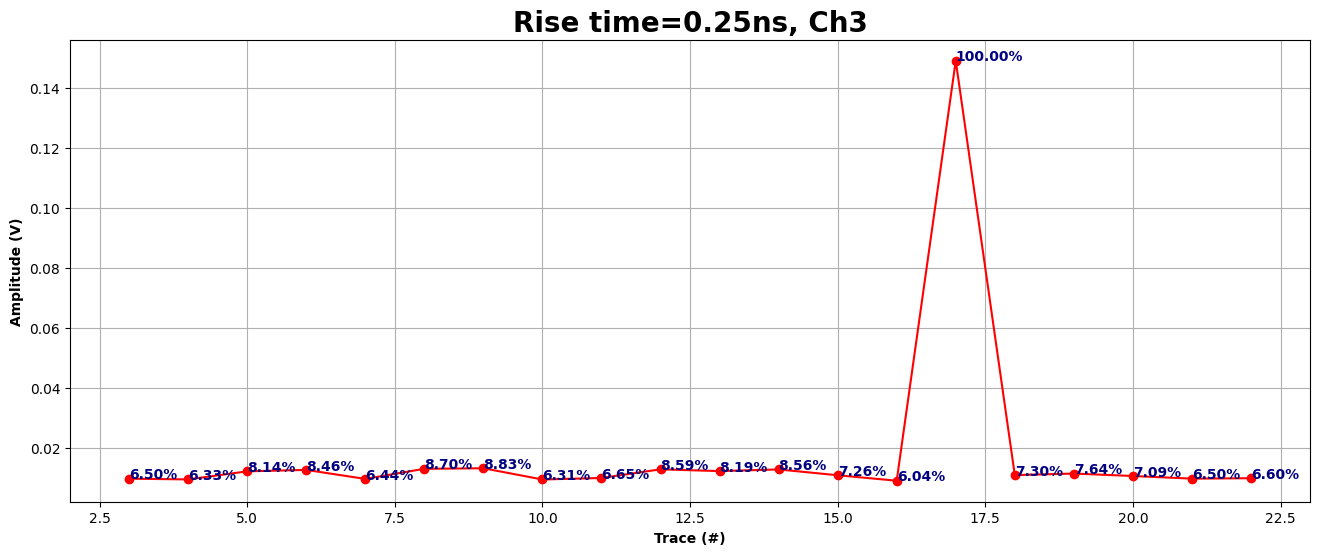

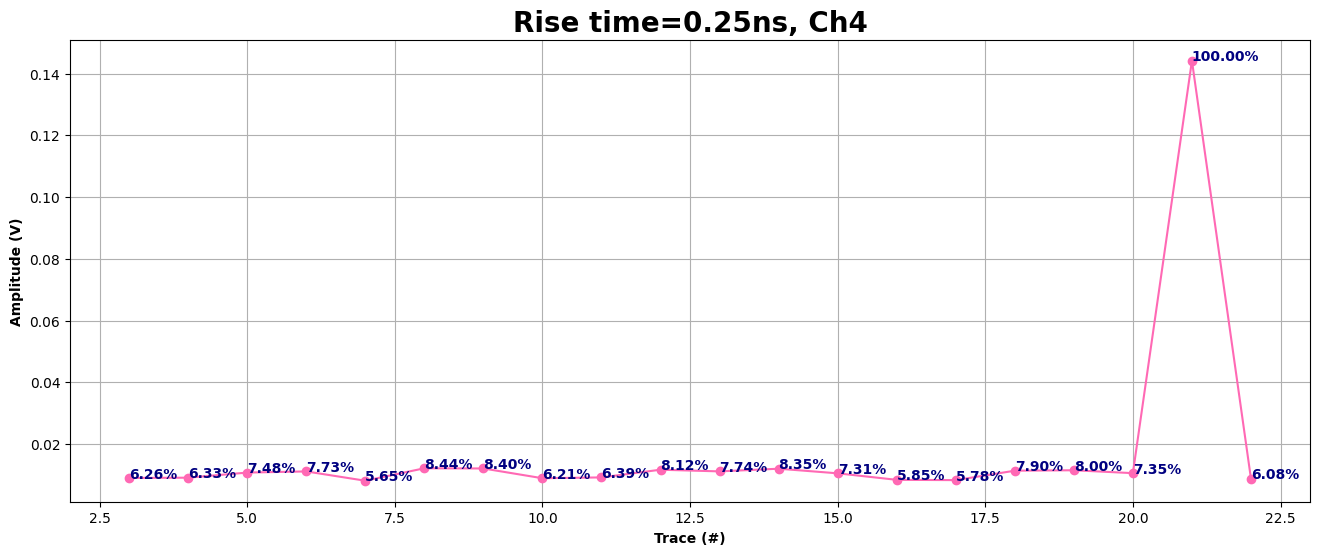

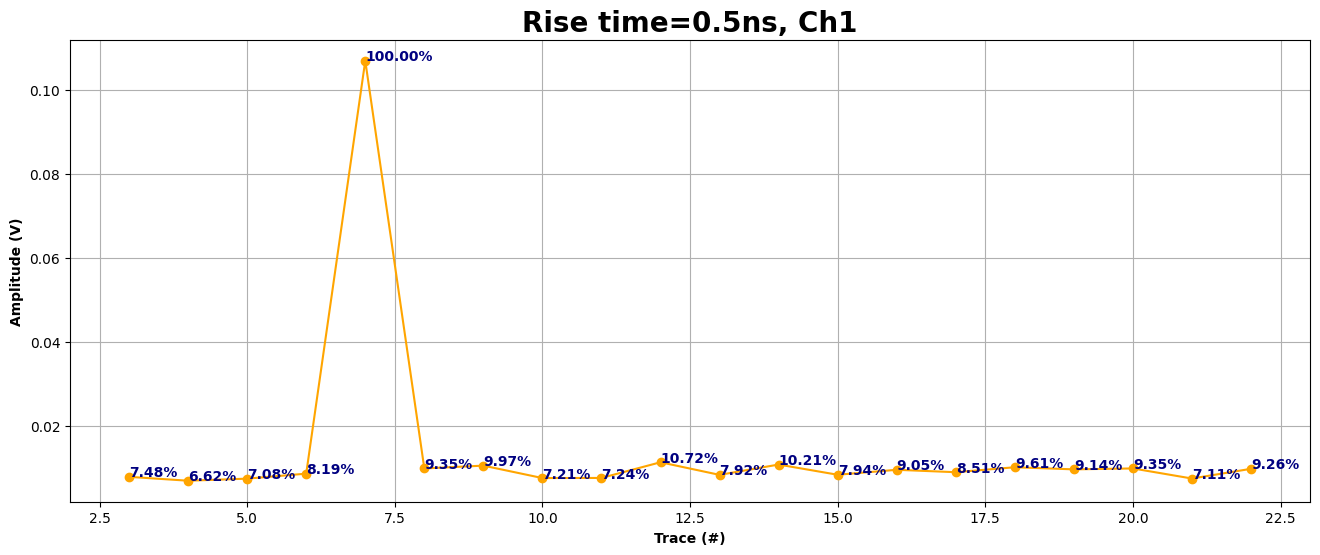

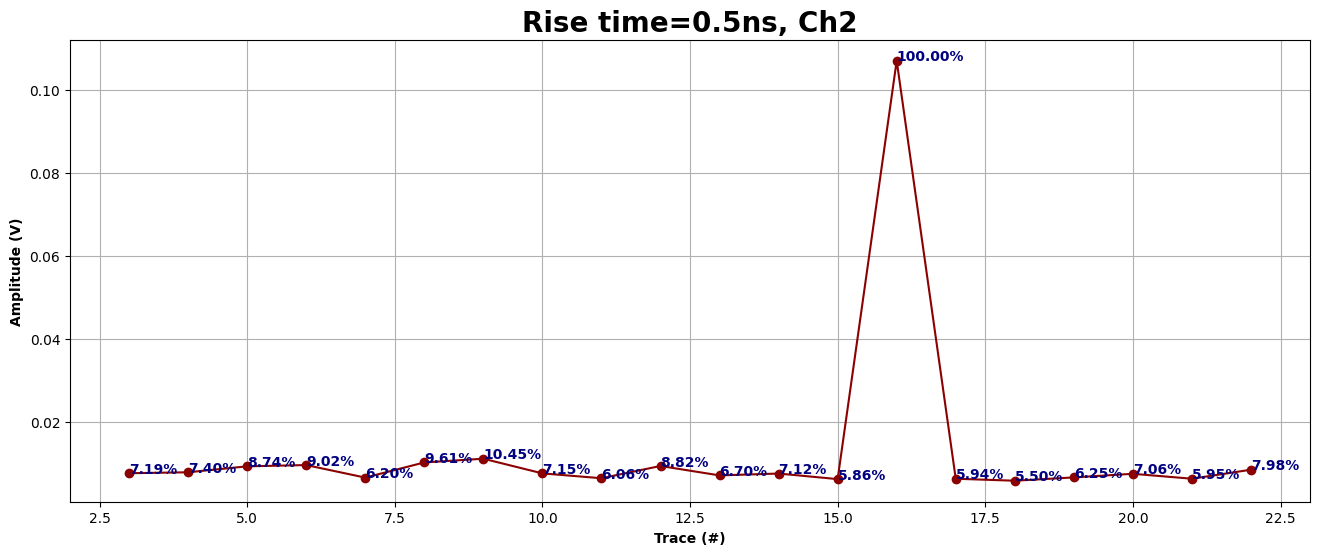

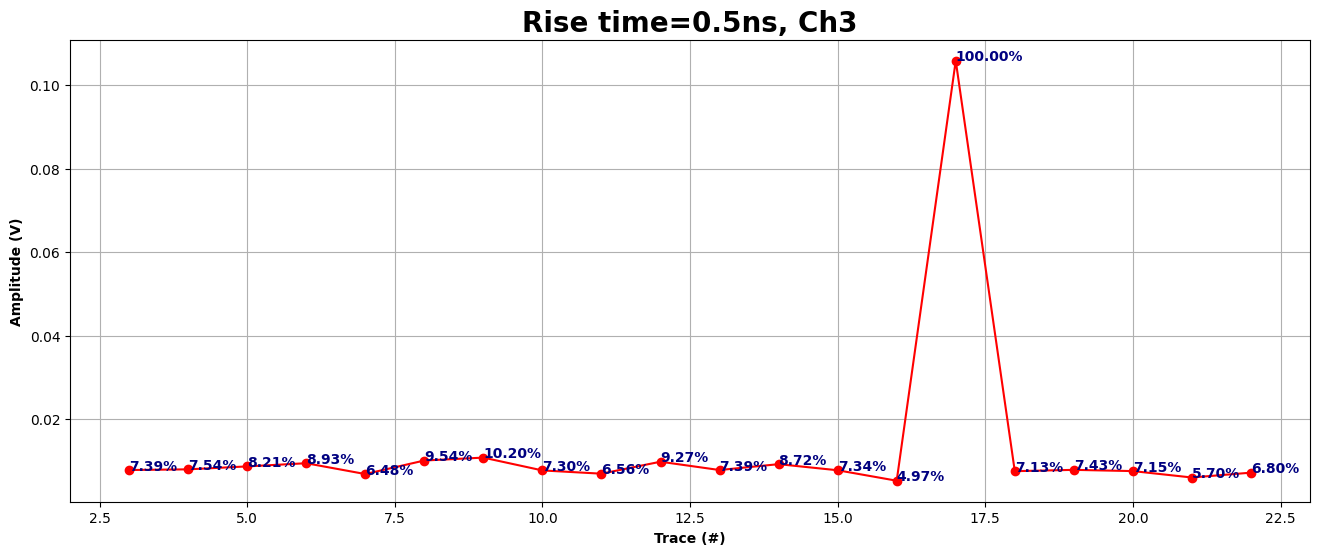

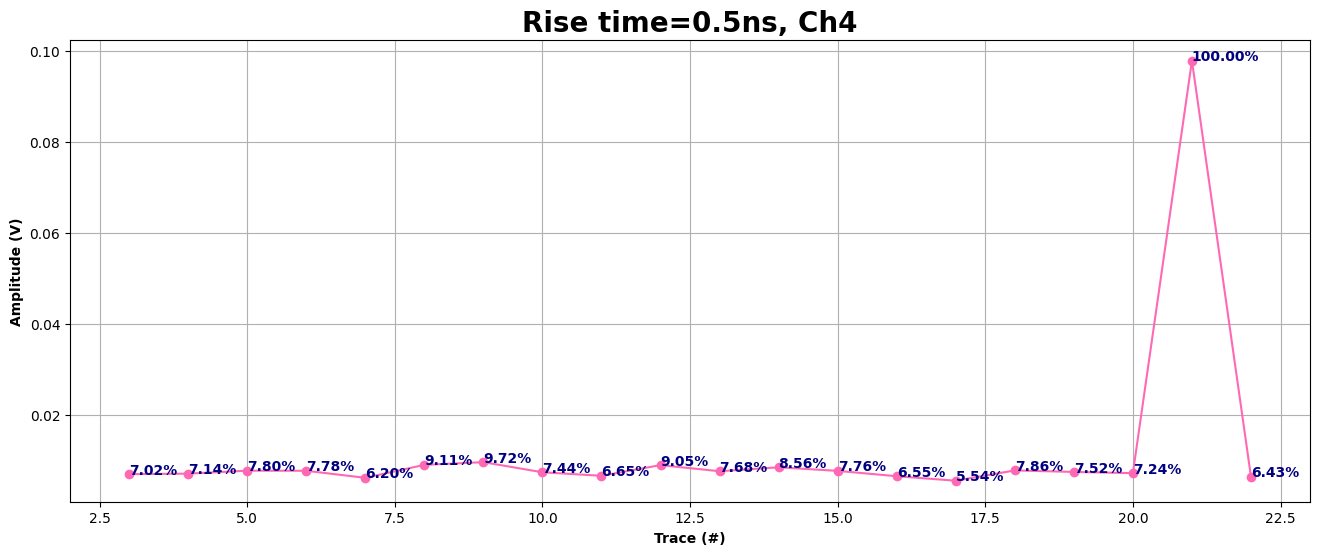

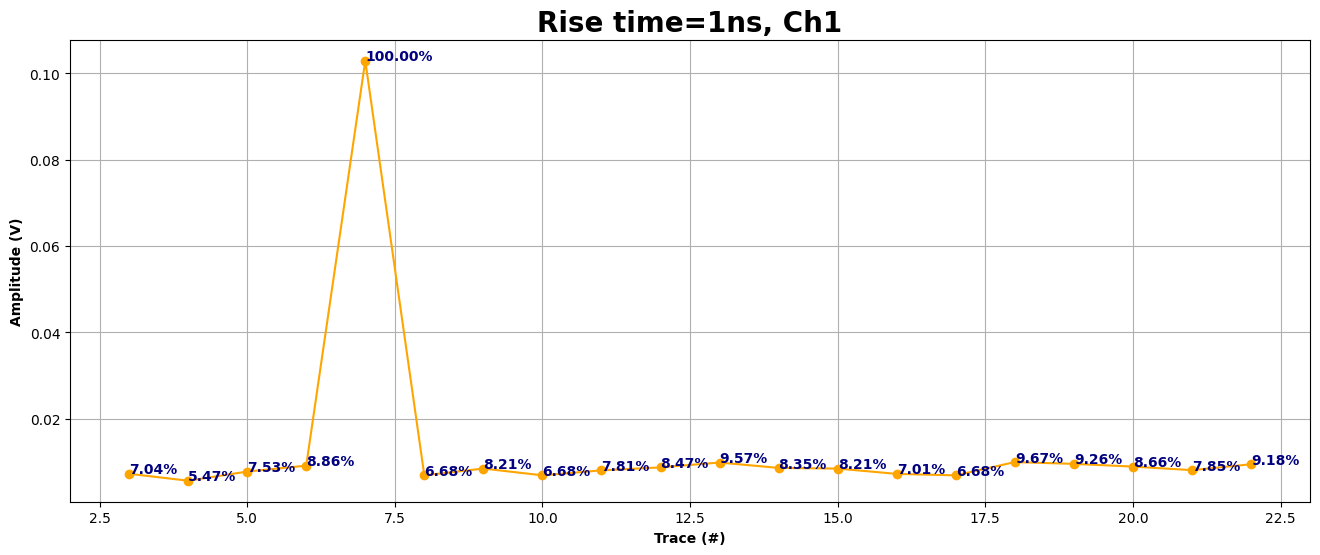

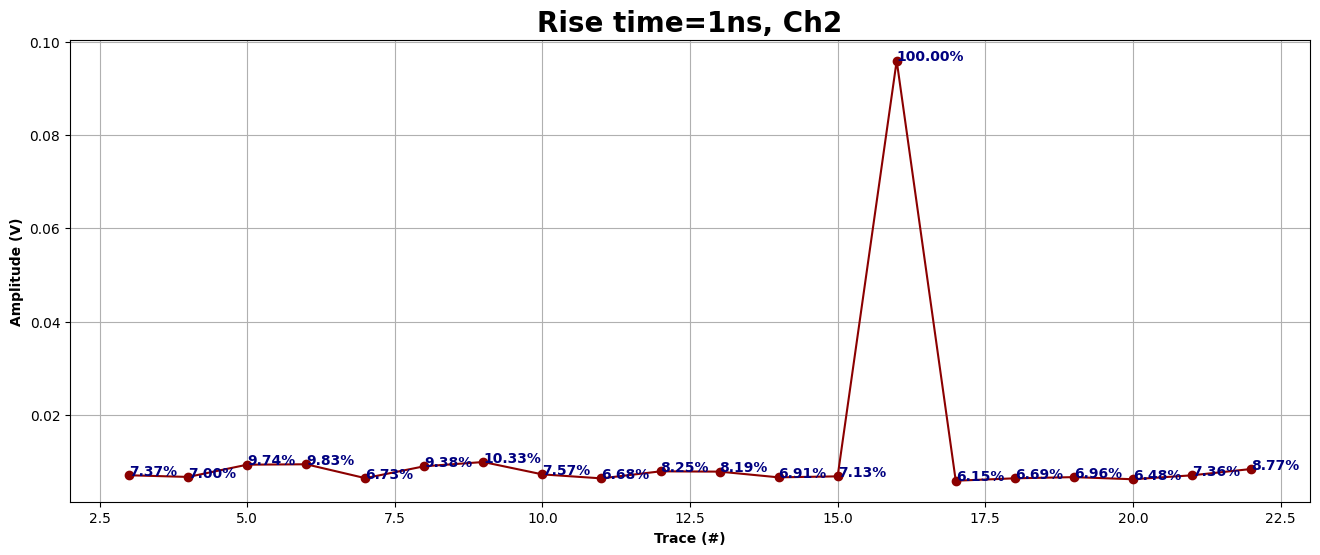

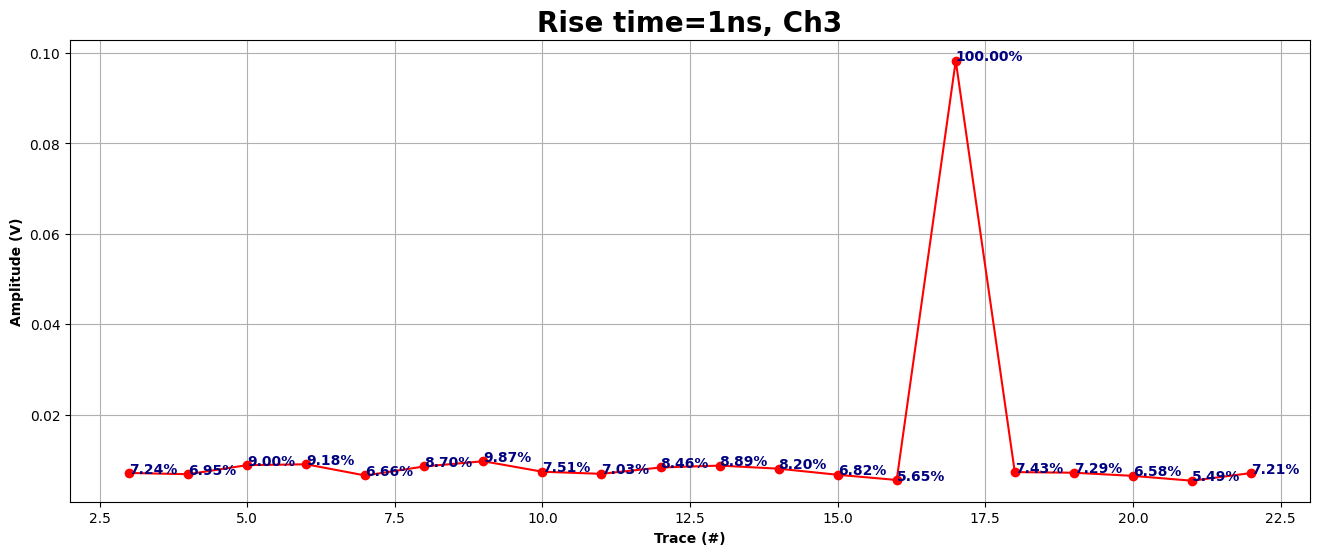

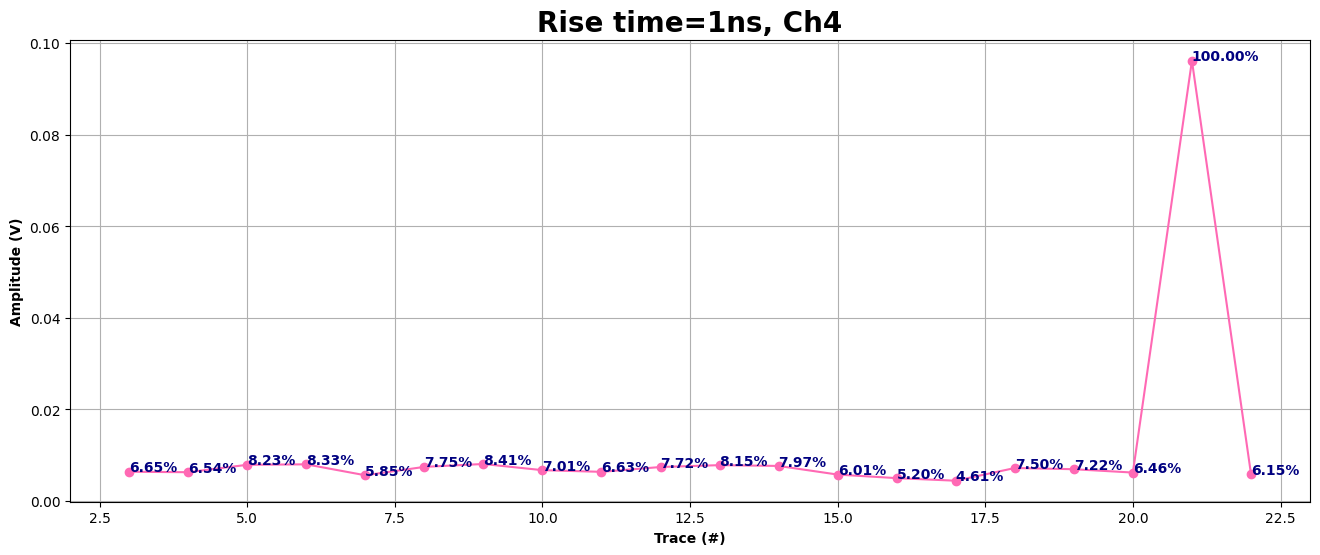

In [ ]:
position = position_plots(list_a,3,22,l=[.25,.5,1],ch_num=4,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.16.17.21/RT-0.25-0.5-1-position")

In [ ]:
def position_overlap(amp,trace_min,trace_max,l,ch_num,ch_list,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/"):
  trace_x = list(range(trace_min,trace_max+1));

  position = [];

  for rt in range(0,len(l)):
    position.append([]);
    for ch in range(ch_num):
      position[rt].append([]);

  for rt in range(0,len(l)):
    for ch in range(ch_num):
      for tr in range(0,trace_max-trace_min+1):
        position[rt][ch].append(np.max(np.abs(amp[rt][tr][ch])));

  sec_max_list = []
  max_value = 0

  for ch in range(ch_num):
    for rt in range(len(l)):

      max_a = np.max(position[rt][ch])
      max_amp = max_a/max_a

      crosstalk = []
      second_max = []

      for amp in position[rt][ch]:
        crosstalk.append((1-(max_a-amp)/max_a)*100)
        second_max.append((1-(max_a-amp)/max_a)*100)

      if max_value < np.max(second_max):
        max_value = np.max(second_max)
        second_max.remove(max_value)
        second_highest = np.max(second_max)
        sec_max_list.append(second_highest)
    max_value=0

  for ch in range(ch_num):
    plt.figure(figsize=(16,8));
    for rt in range(len(l)):
      #finding % cross talk
      max_a = np.max(position[rt][ch])
      max_amp = max_a/max_a

      crosstalk = []
      for amp in position[rt][ch]:
        crosstalk.append((1-(max_a-amp)/max_a)*100)

      #plot
      plt.title(f"Rise time= .25, .5, 1ns, Ch{ch_list[ch]}",fontweight="heavy", fontsize=20);
      plt.ylabel("Amplitude (V)", fontweight="heavy", fontsize=10)
      plt.xlabel("Trace (#)", fontweight="heavy", fontsize=10)
      plt.ylim(0,sec_max_list[ch]*1.25)
      plt.xlim(trace_min-1,trace_max+1)
      plt.xticks(trace_x)
      locator = MultipleLocator(1)  # Set tick locator to increment by 5%
      formatter = FuncFormatter(lambda x, _: f'{int(x)}%')  # Format tick labels as percentages

      #Customize y-axis ticks
      plt.gca().yaxis.set_major_locator(locator)
      plt.gca().yaxis.set_major_formatter(formatter)

      #plt.gca().yaxis.set_major_formatter(PercentFormatter())
      plt.grid(True)
      if l[rt] == .25:
        c = "darkred"
      elif l[rt] == .5:
        c = "red"
      else:
        c = "orange"
      plt.plot(trace_x,crosstalk,color=c,marker="o", label=f"Rise time = {l[rt]}");
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

      for i in range(len(trace_x)):
        plt.annotate(f'{crosstalk[i]:.2f}%', (trace_x[i], crosstalk[i]), fontsize=10, fontweight="heavy", color="navy")

      crosstalk.remove(np.max(np.abs(crosstalk)))

      print(f"Average Amplitude for Rise Time {l[rt]}: {np.mean(crosstalk):.2f}%")

      plt.savefig(f'{directory}/position-abs-scale-ch{ch+1}.png')

    plt.show();
    print("\n")

Average Amplitude for Rise Time 0.25: 8.88%
Average Amplitude for Rise Time 0.5: 8.52%
Average Amplitude for Rise Time 1: 7.96%


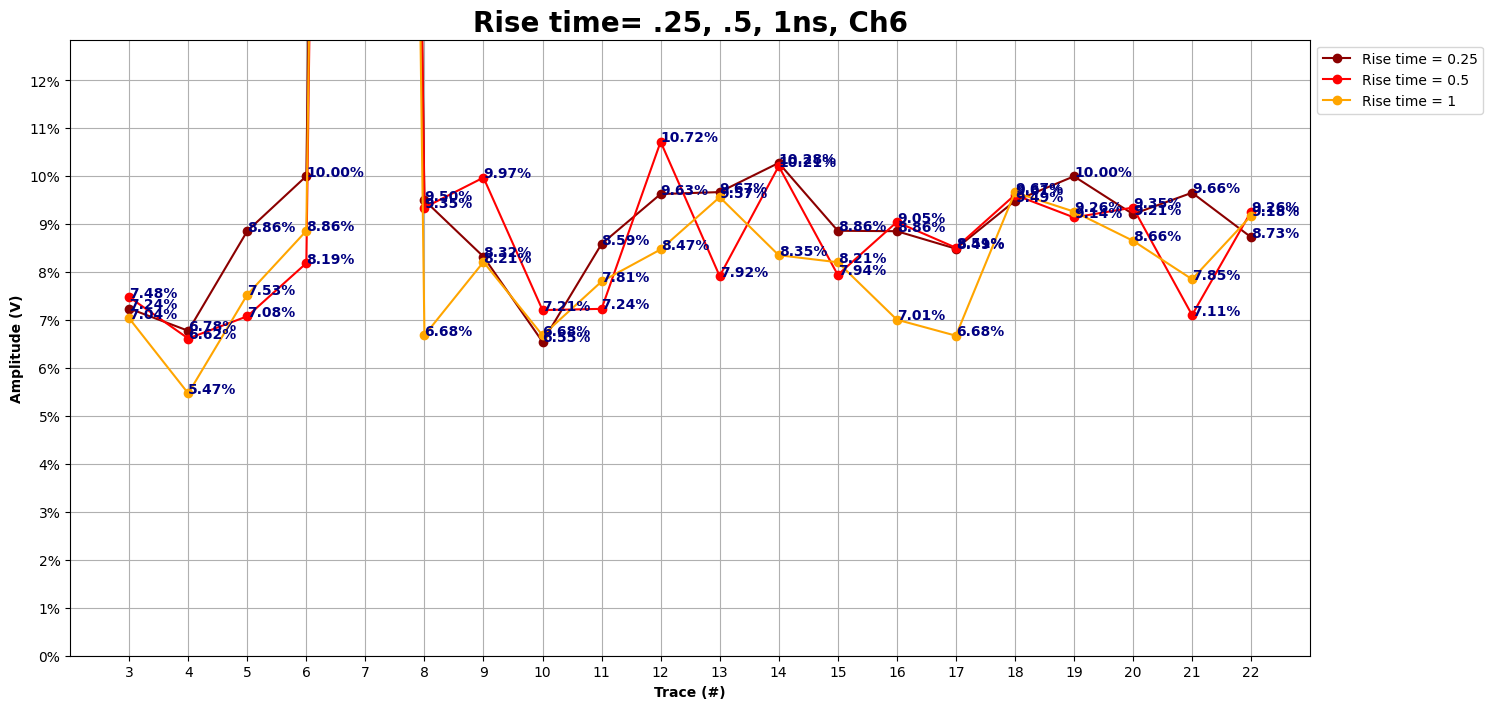



Average Amplitude for Rise Time 0.25: 7.28%
Average Amplitude for Rise Time 0.5: 7.32%
Average Amplitude for Rise Time 1: 7.76%


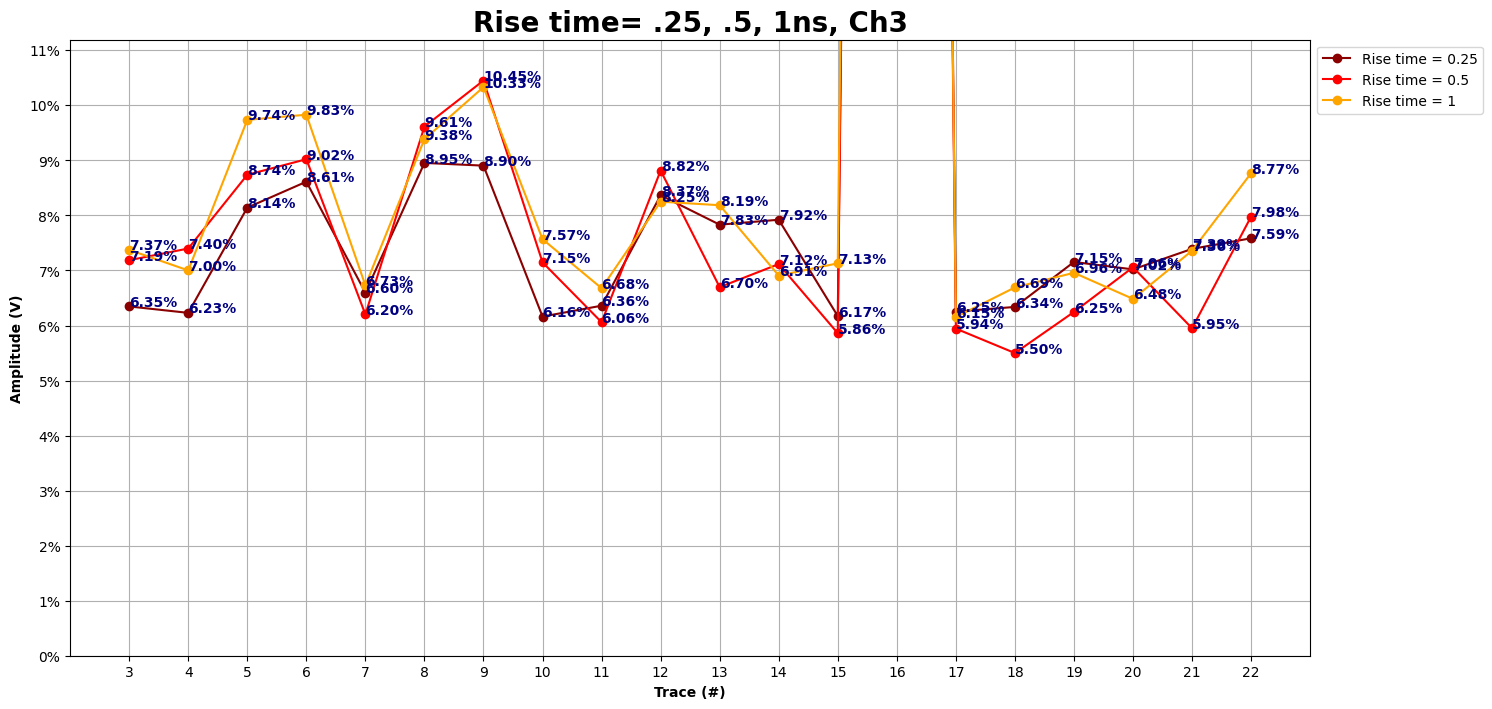



Average Amplitude for Rise Time 0.25: 7.37%
Average Amplitude for Rise Time 0.5: 7.58%
Average Amplitude for Rise Time 1: 7.59%


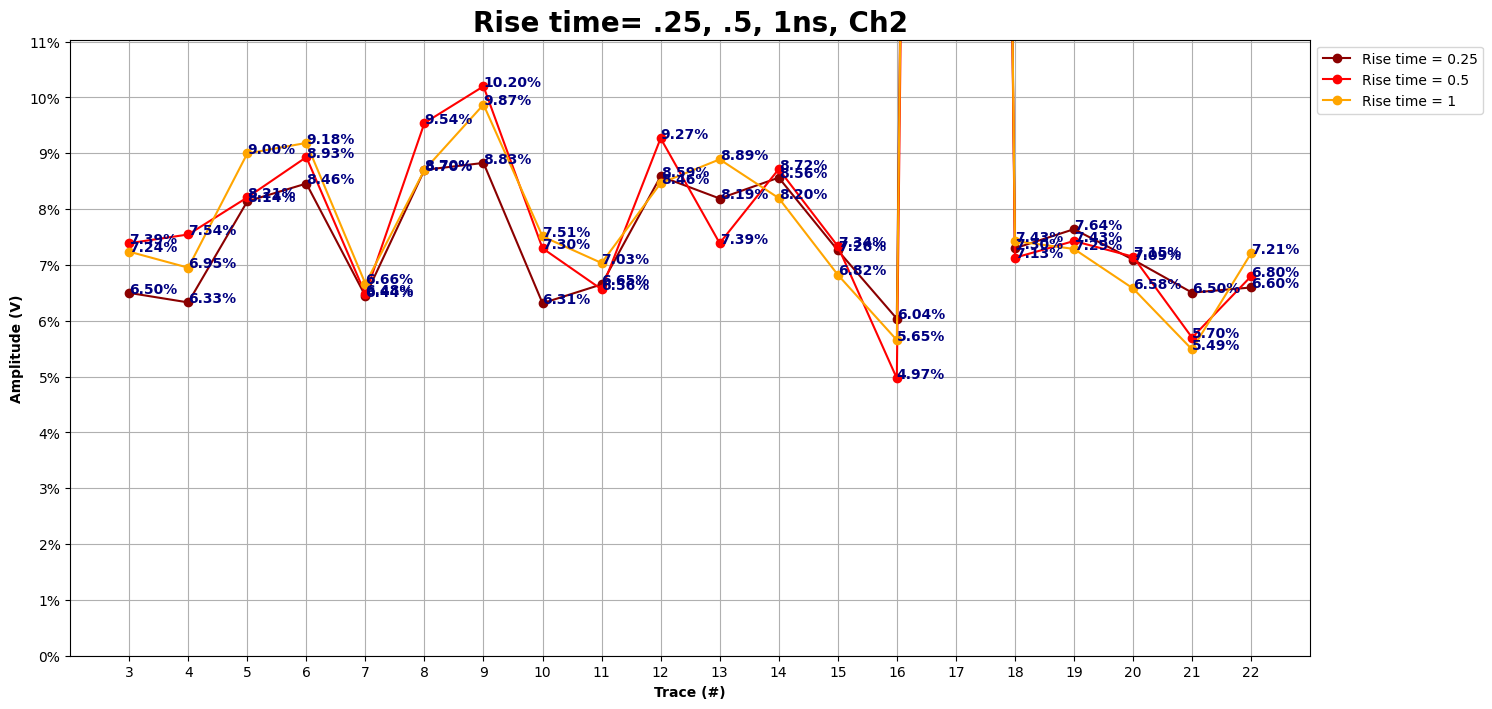



Average Amplitude for Rise Time 0.25: 7.12%
Average Amplitude for Rise Time 0.5: 7.53%
Average Amplitude for Rise Time 1: 6.97%


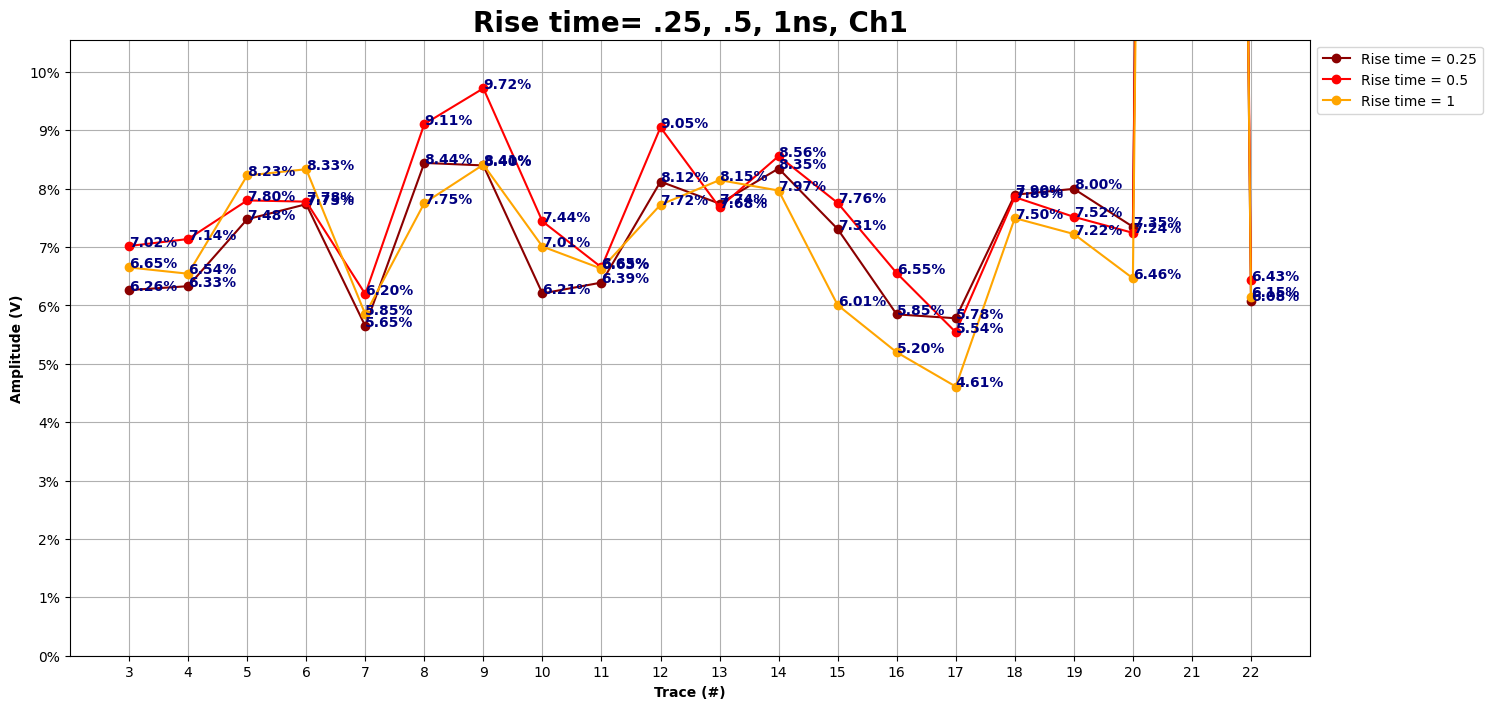

In [ ]:
position_overlap(list_a,3,22,[.25,.5,1],4,ch_list=[6,3,2,1],saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.16.17.21/RT-0.25-0.5-1-position")

In [ ]:
def noise_list(ch_num,rt_num,cm_num):
  list_wave = []

  for rise_time in range(0,rt_num):
    list_wave.append([])

  list_t = []
  for rise_time in range(0,rt_num):
    list_t.append([])

  list_a = []
  for rise_time in range(0,rt_num):
    list_a.append([])

  for rise_time in range(0,rt_num):
    for ch_num in range(1,ch_num+1):
      list_ = f"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Lab Data Transfer/4.22.2024/7-16-17-21/7-16-17-21-noise/C{ch_num}--7-10-11-21-n{cm_num}cm--0000{rise_time}.csv"

      list_t[rise_time].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["time"])
      list_a[rise_time].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])

  return list_t,list_a

In [ ]:
noise_t_1cm, noise_a_1cm= noise_list(4,3,1)
noise_t_2cm, noise_a_2cm= noise_list(4,3,2)

In [ ]:
def noise_plot(amp,noise_a,noise_t,l,cm,dir="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/"):
  abs_max_n = np.abs(noise_a)

  max_n = np.max(abs_max_n)

  abs_max_inj = np.abs(amp)

  max_inj = np.max(abs_max_inj)



  for rt in range(0,len(l)):
    plt.figure()
    plt.title(f"Noise Hovering {cm}cm; Rise time= {l[rt]}",fontweight="heavy", fontsize=20);
    plt.ylabel("Amplitude (V)", fontweight="heavy", fontsize=10)
    plt.xlabel("Time (sec)", fontweight="heavy", fontsize=10)

    max_ch_n = np.max(abs_max_n[rt])

    crosstalk = (1-(max_inj - max_ch_n)/max_inj)*100

    print(f"Cross talk for Rise Time {l[rt]}: {crosstalk:.2f}%")

    for ch in range(0,ch_num):
      plt.plot(noise_t[rt][ch],noise_a[rt][ch], label=f"Channel={ch+1}")
      plt.ylim(-max_n*1.1,max_n*1.1)

    plt.savefig(f'{dir}/cm{cm}-noise-rt{rt+1}.png')


    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.show()
    print("\n")

Cross talk for Rise Time 0.25: 2.54%


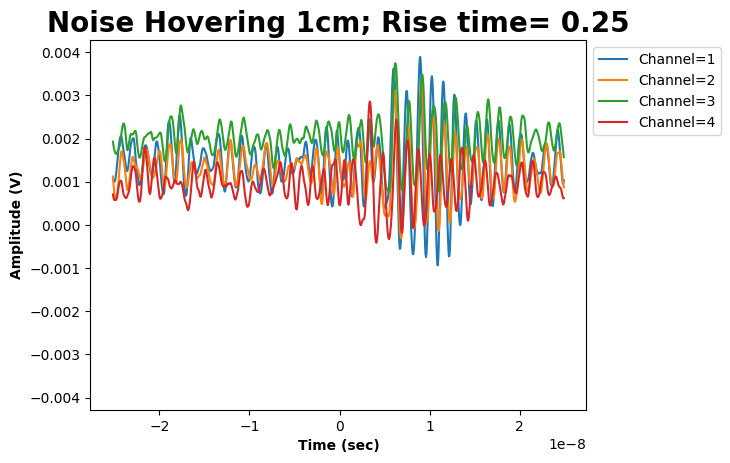



Cross talk for Rise Time 0.5: 2.33%


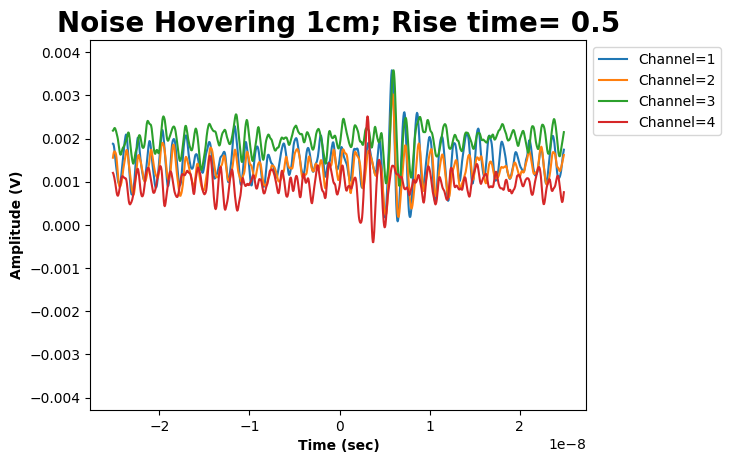



Cross talk for Rise Time 1: 1.86%


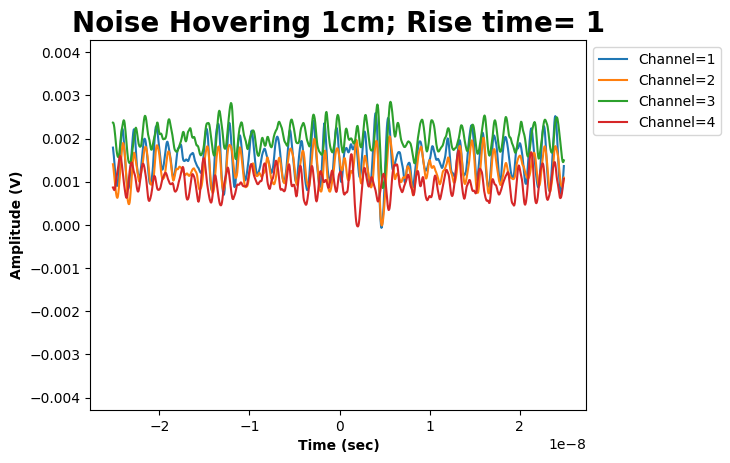

In [ ]:
noise_plot(list_a,noise_a_1cm,noise_t_1cm,[0.25,.5,1],1,"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.16.17.21/RT-0.25-0.5-1-noise")

Cross talk for Rise Time 0.25: 2.43%


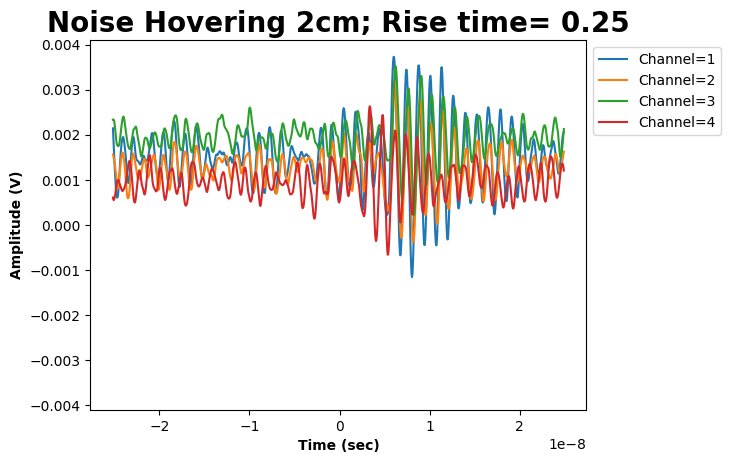



Cross talk for Rise Time 0.5: 2.04%


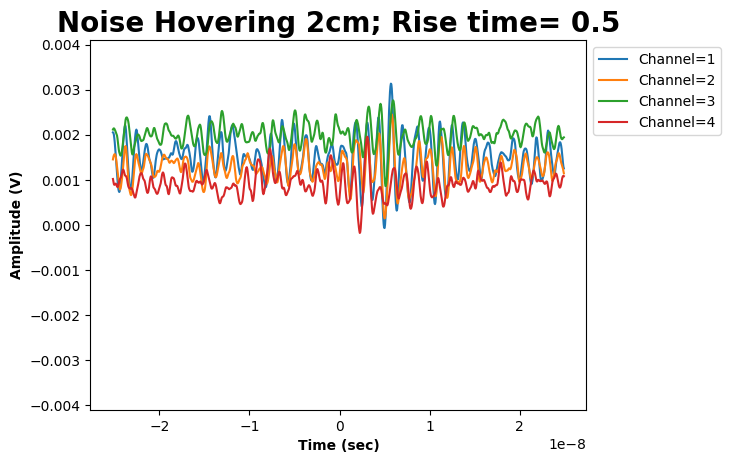



Cross talk for Rise Time 1: 1.76%


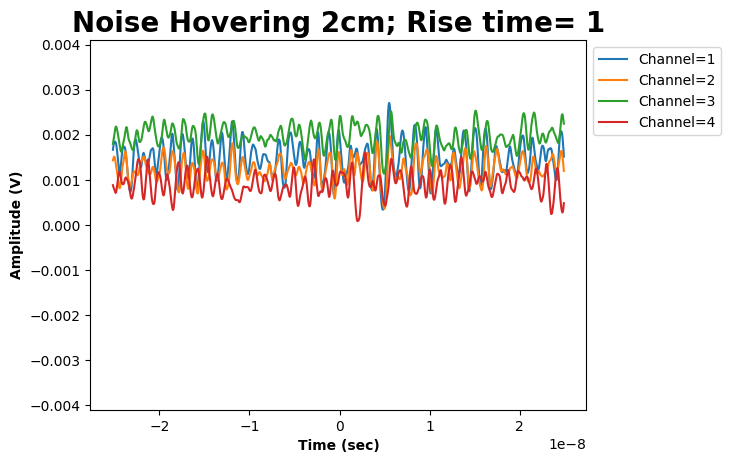

In [ ]:
noise_plot(list_a,noise_a_2cm,noise_t_2cm,[0.25,.5,1],2,"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.16.17.21/RT-0.25-0.5-1-noise")

In [ ]:
def flex5_list(trace_min,trace_max,ch_num,rt_num,l):
  list_wave = []
  trace_max += 1

  for rise_time in range(0,rt_num):
    list_wave.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_wave[rise_time].append([])

  list_t = []
  for rise_time in range(0,rt_num):
    list_t.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_t[rise_time].append([])

  list_a = []
  for rise_time in range(0,rt_num):
    list_a.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_a[rise_time].append([])

  for rise_time in range(0,rt_num):
    for inj_num in range(trace_min,trace_max):
      for ch_num in range(1,ch_num+1):
        list_ = f"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Lab Data Transfer/7-11-17/inj{inj_num}/C{ch_num}--inj{inj_num}-7-11-17-21-l{l[rise_time]}--00000.csv"
        if l[rise_time] == l[0]:
          list_t[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.25','.25'), names='time, amplitude', delimiter=",", skip_header=5)["time"])
          list_a[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.25','.25'), names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])
        elif l[rise_time] == l[1]:
          list_t[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.5','.5'), names='time, amplitude', delimiter=",", skip_header=5)["time"])
          list_a[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.5','.5'), names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])
        else:
          list_t[rise_time][inj_num-6].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["time"])
          list_a[rise_time][inj_num-6].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])

  return list_t,list_a

In [ ]:
l = [0.25,0.5,1]
#inject T5-22
flex5_t, flex5_a = flex5_list(6,22,4,3,l)


In [ ]:
def wave7101121(trace_min,trace_max,ch_num,rt_num):
  list_wave = []
  trace_max += 1

  for rise_time in range(0,rt_num):
    list_wave.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_wave[rise_time].append([])

  list_t = []
  for rise_time in range(0,rt_num):
    list_t.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_t[rise_time].append([])

  list_a = []
  for rise_time in range(0,rt_num):
    list_a.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_a[rise_time].append([])

  for rise_time in range(0,rt_num):
    for inj_num in range(trace_min,trace_max):
      for ch_num in range(1,ch_num+1):
        list_ = f"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Lab Data Transfer/4.19.2024/7-10-11-21/7-10-11-21-inj/C{ch_num}--7-10-11-21-inj{inj_num}--0000{rise_time}.csv"

        list_t[rise_time][inj_num-1].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["time"])
        list_a[rise_time][inj_num-1].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])

  return list_t,list_a

In [ ]:
#inject T1-24
wave7101121_t, wave7101121_a = wave7101121(1,24,4,3)

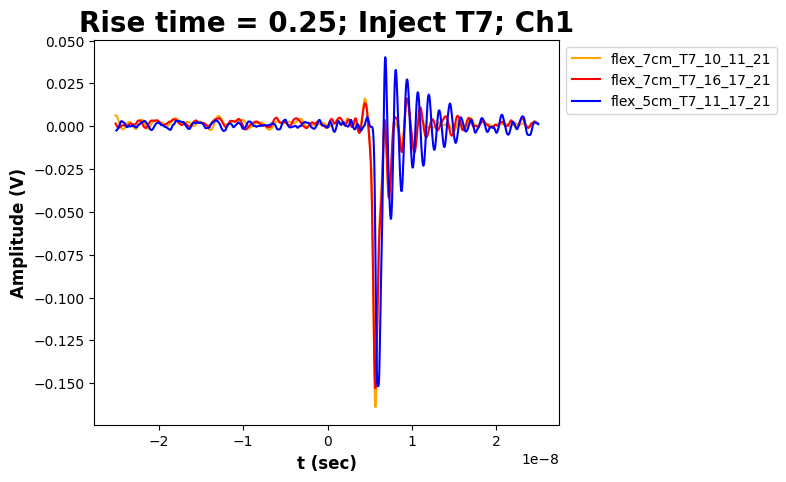

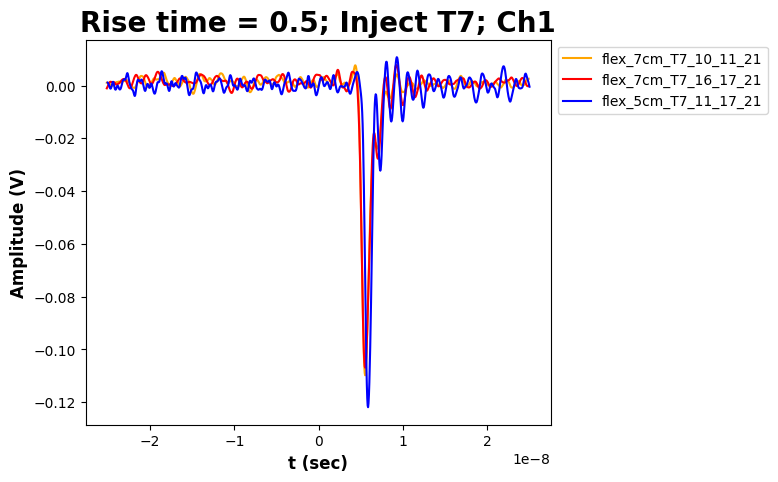

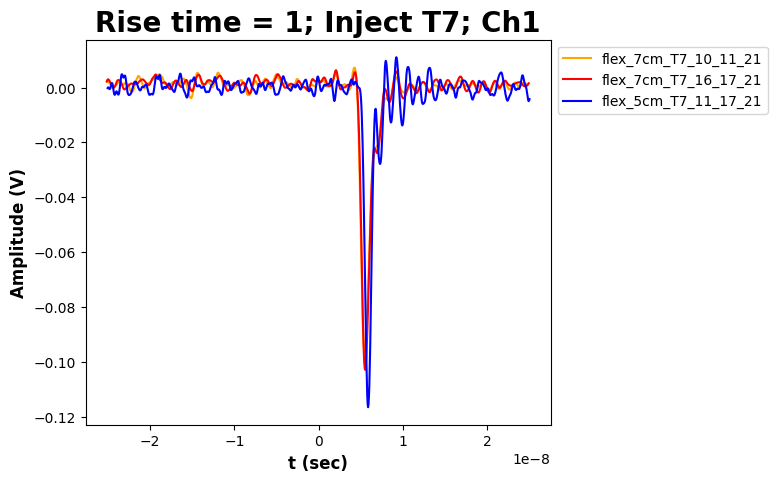

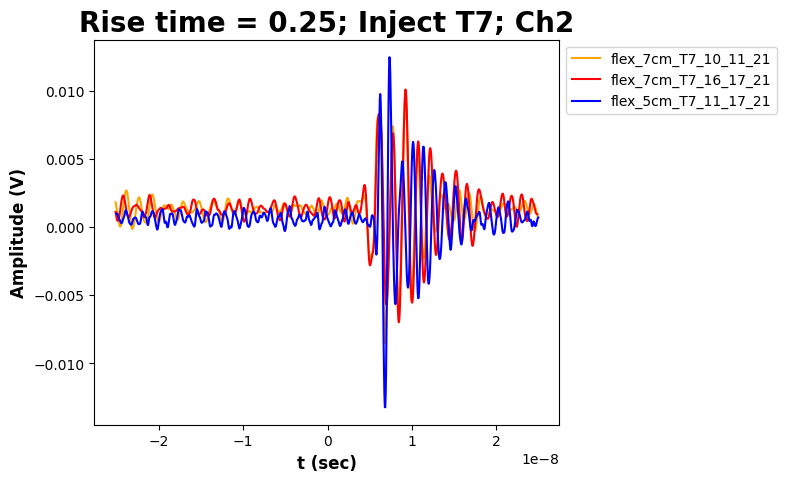

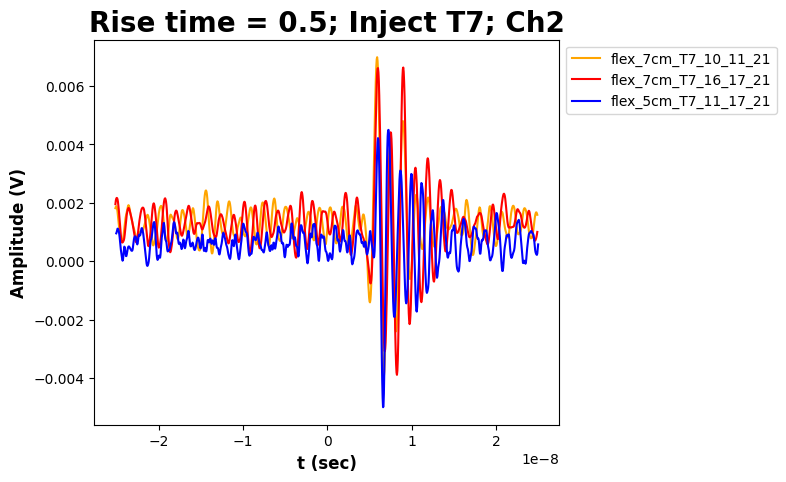

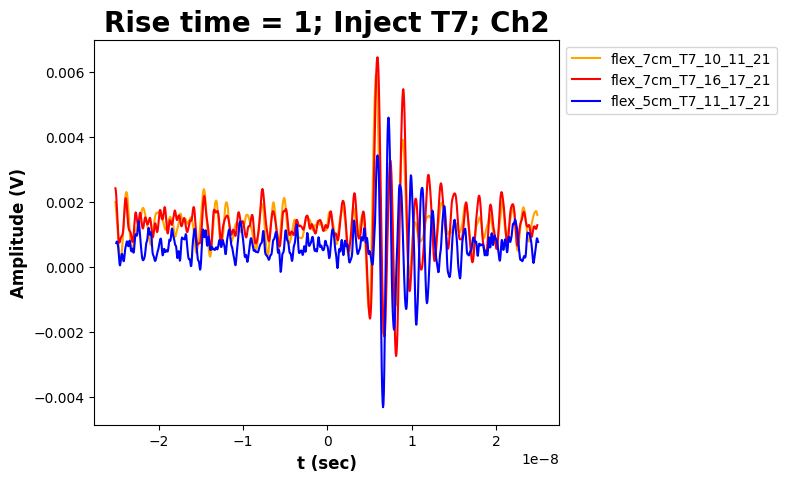

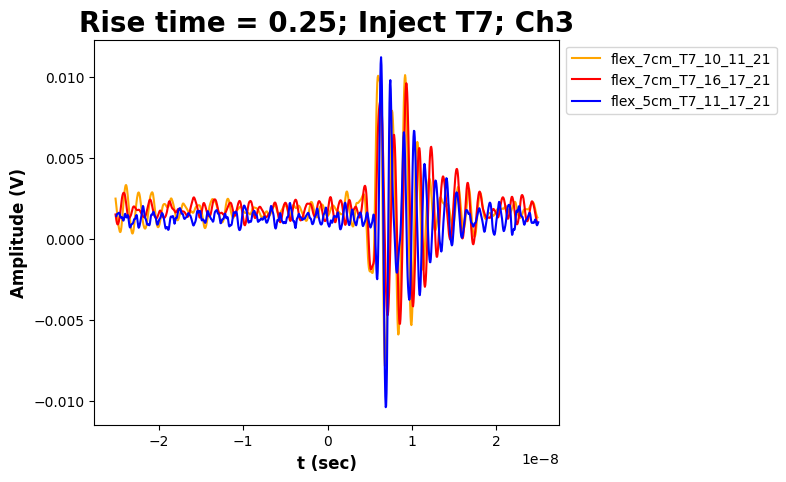

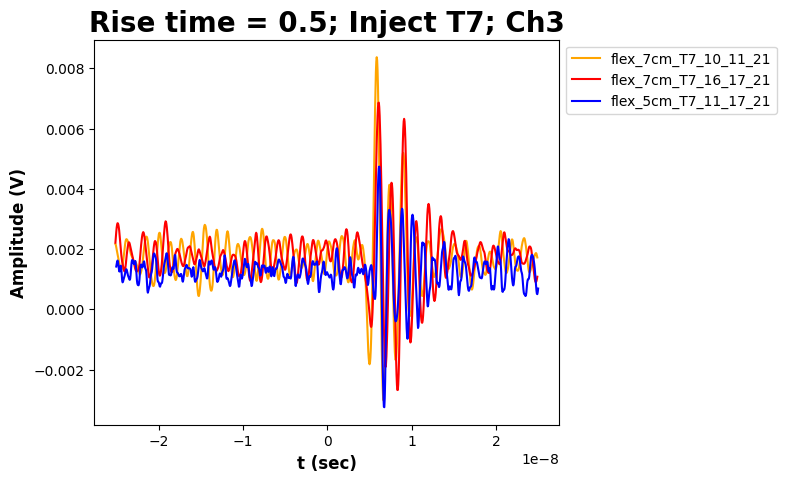

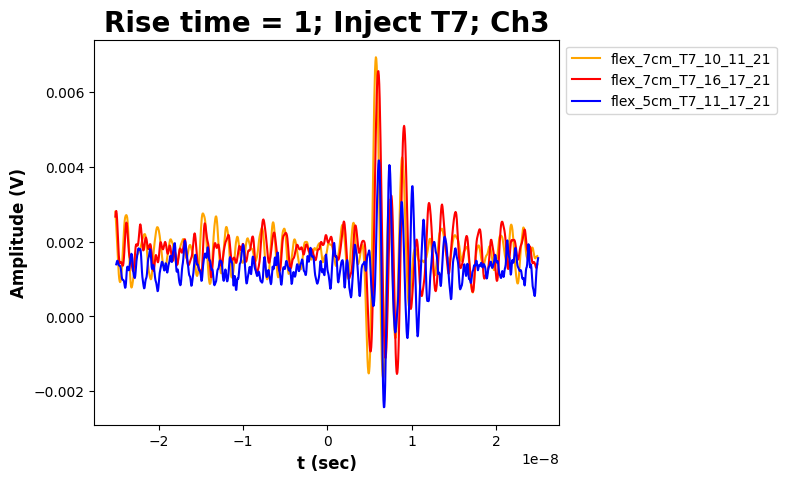

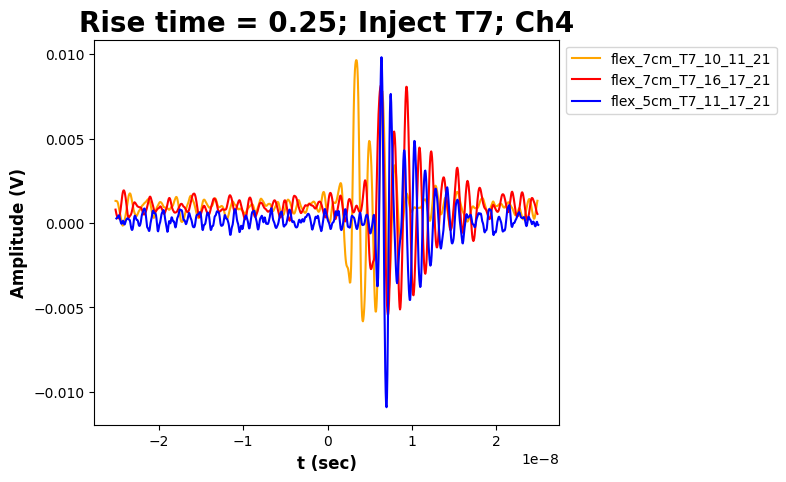

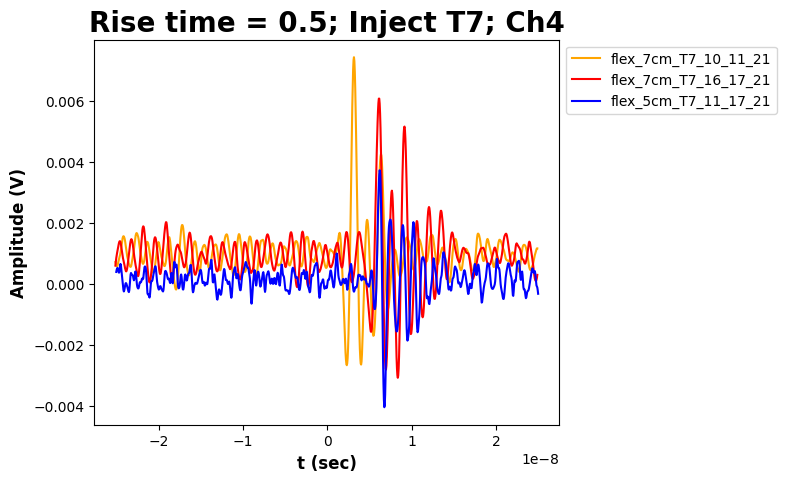

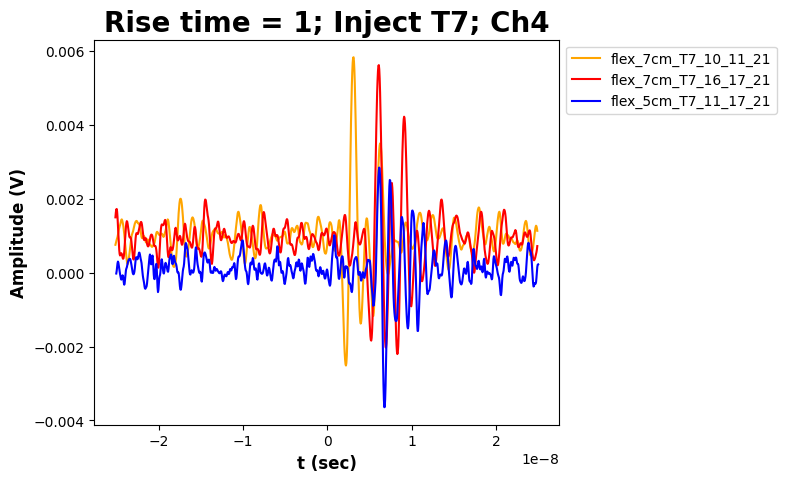

In [ ]:
for j in range(0,4):
  for i in range(0,3):
    plt.figure(figsize=(6,5))
    plt.title(f"Rise time = {l[i]}; Inject T7; Ch{j+1}", fontweight="heavy",fontsize=20)
    plt.xlabel("t (sec)",fontweight="heavy",fontsize=12)
    plt.ylabel("Amplitude (V)",fontweight="heavy",fontsize=12)
    plt.plot(wave7101121_t[i][6][j],wave7101121_a[i][6][j], color="orange", label="flex_7cm_T7_10_11_21");
    plt.plot(list_t[i][4][j],list_a[i][4][j], color="red", label="flex_7cm_T7_16_17_21");
    plt.plot(flex5_t[i][1][j],flex5_a[i][1][j], color="blue", label="flex_5cm_T7_11_17_21");
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.savefig(f'/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Comparison Graphs/injT7-compare-flex5cm-7cm-T7-11-17-21-T7-10-11-21-T7-16-17-21-rt{l[i]}-ch{j+1}.png')
    plt.show()

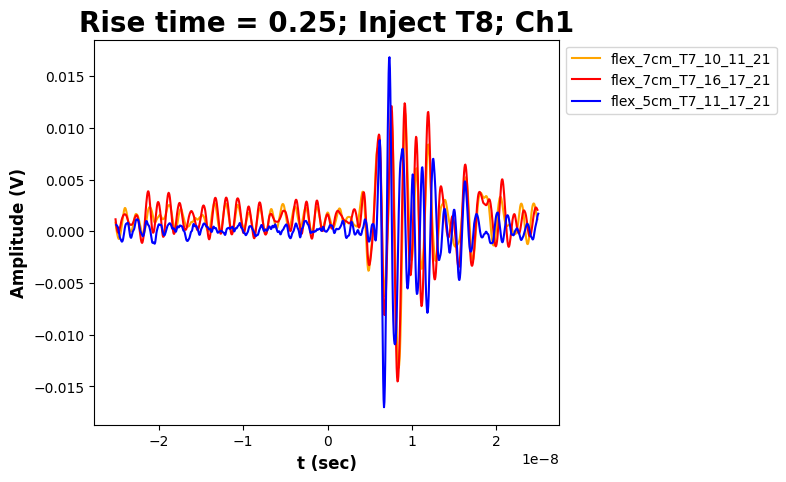

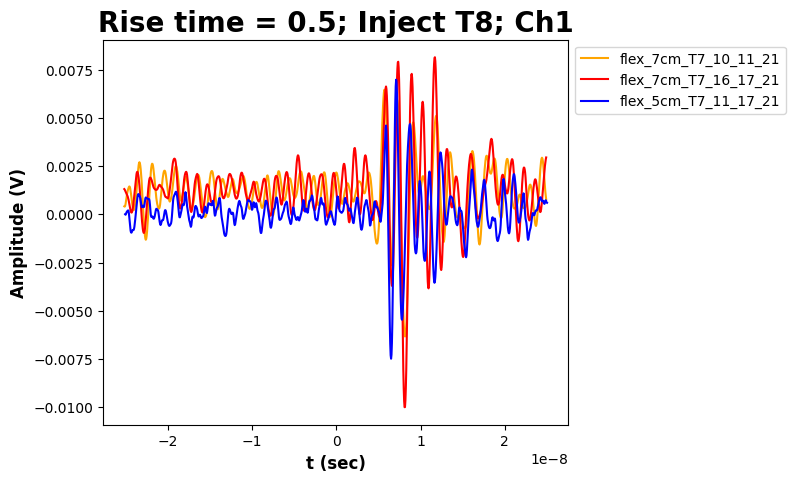

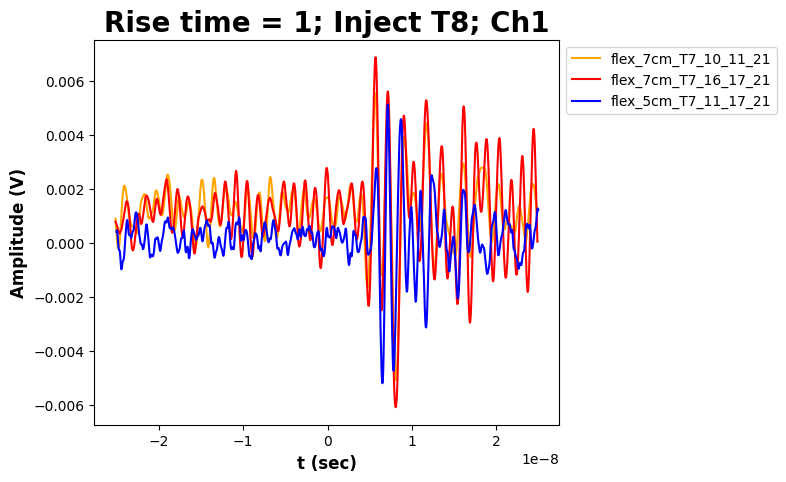

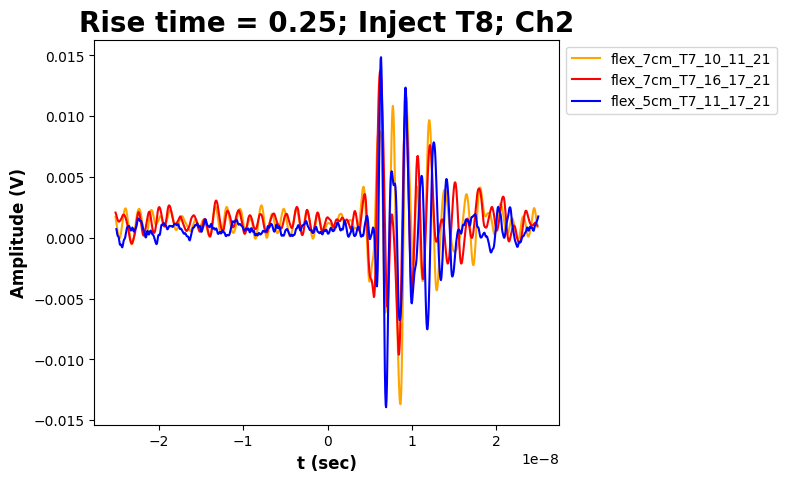

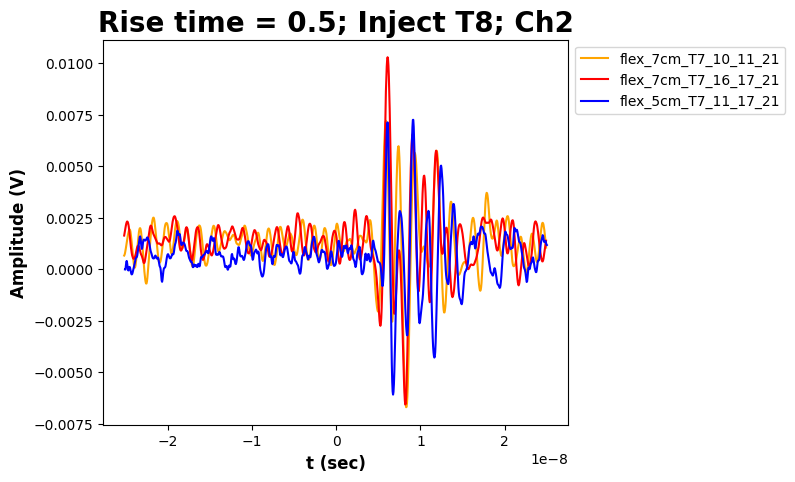

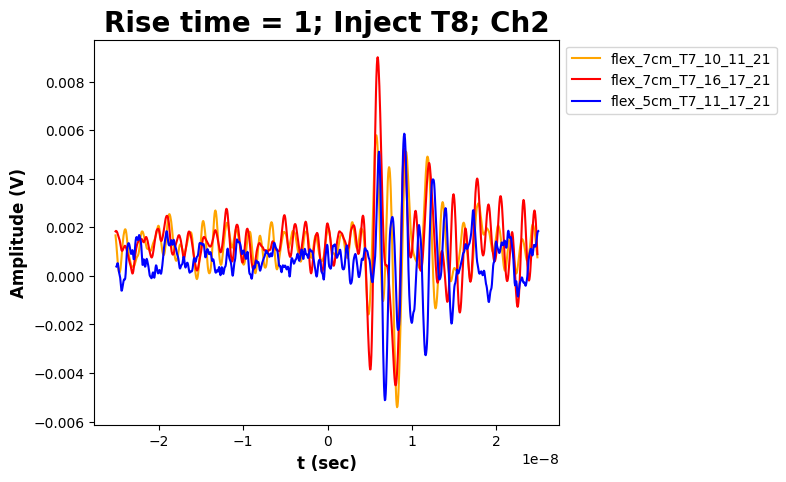

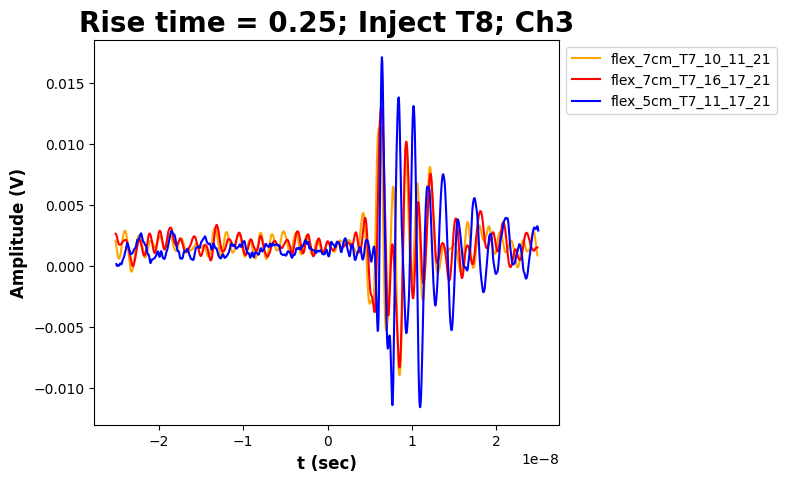

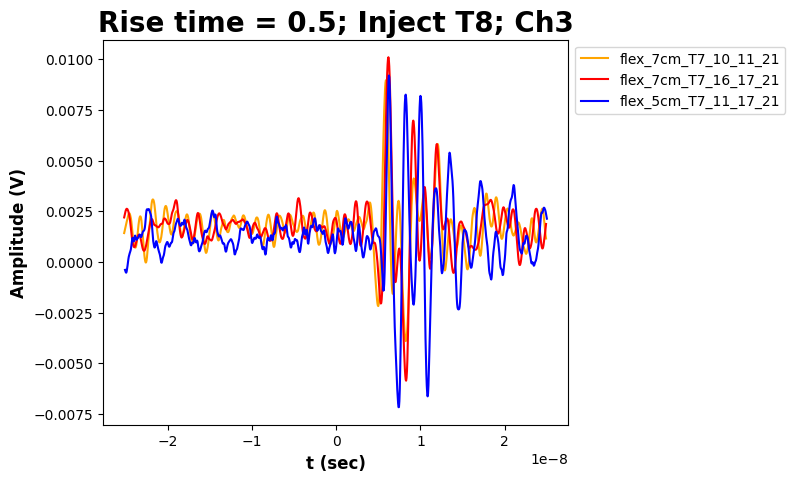

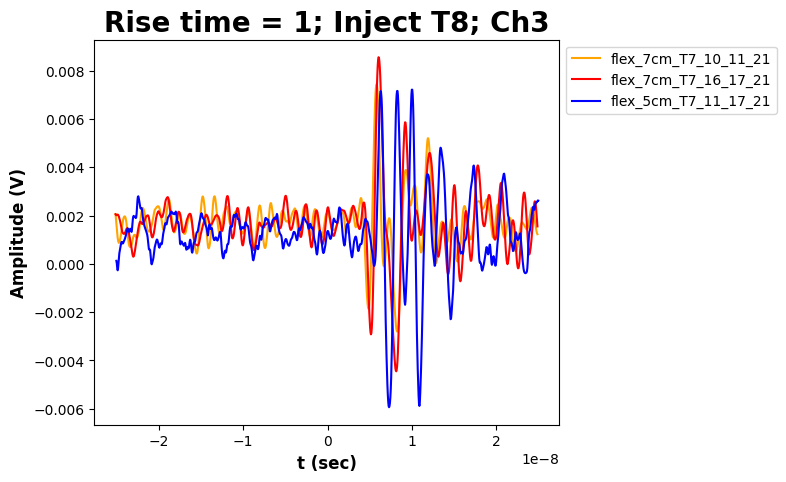

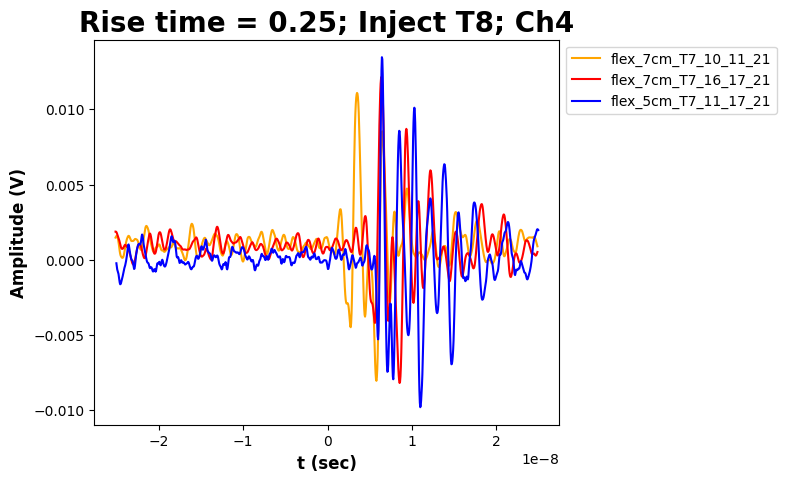

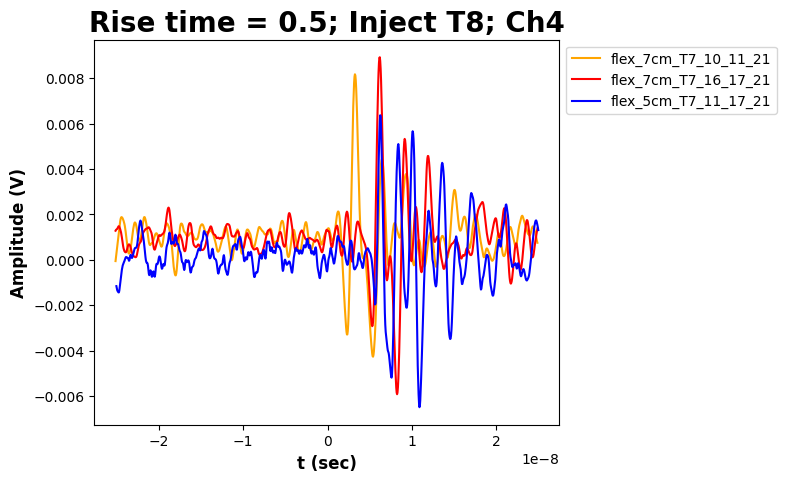

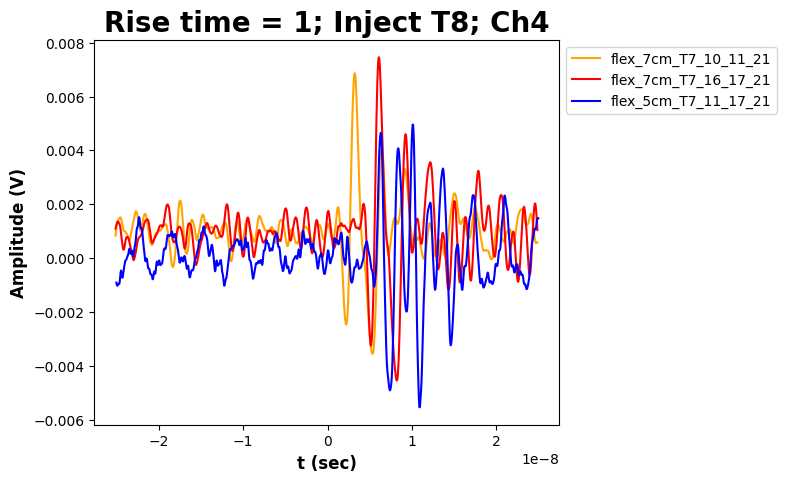

In [89]:
for j in range(0,4):
  for i in range(0,3):
    plt.figure(figsize=(6,5))
    plt.title(f"Rise time = {l[i]}; Inject T8; Ch{j+1}", fontweight="heavy",fontsize=20)
    plt.xlabel("t (sec)",fontweight="heavy",fontsize=12)
    plt.ylabel("Amplitude (V)",fontweight="heavy",fontsize=12)
    plt.plot(wave7101121_t[i][7][j],wave7101121_a[i][7][j], color="orange", label="flex_7cm_T7_10_11_21");
    plt.plot(list_t[i][5][j],list_a[i][5][j], color="red", label="flex_7cm_T7_16_17_21");
    plt.plot(flex5_t[i][2][j],flex5_a[i][2][j], color="blue", label="flex_5cm_T7_11_17_21");
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.savefig(f'/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Comparison Graphs/injT8-compare-flex5cm-7cm-T7-11-17-21-T7-10-11-21-T7-16-17-21-rt{l[i]}-ch{j+1}.png')
    plt.show()